<a href="https://colab.research.google.com/github/oneryigit/tutorials/blob/main/Coefficient_Plot_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Linear Regression Coefficents

In [1]:
#Loading Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Loading a built-in dataset from STATA.

df=sm.datasets.webuse('auto')

df.head()


,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic


In [3]:
# Let's create an OLS model.

model = smf.ols(formula= 'price ~ mpg + weight + length + gear_ratio + C(foreign)', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     16.78
Date:                Mon, 24 Jan 2022   Prob (F-statistic):           9.10e-11
Time:                        06:04:12   Log-Likelihood:                -665.98
No. Observations:                  74   AIC:                             1344.
Df Residuals:                      68   BIC:                             1358.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              7319.41

In [4]:
# we need three things for building the coefficient plot:

# Point estimates (coef)
# Confidence intervals ([0.025, 0.975]), the error bar lengths
# Variable names


model.params # #to reach coefficents)

Intercept                7319.411173
C(foreign)[T.Foreign]    3822.785079
mpg                        -6.236780
weight                      5.456584
length                    -88.599664
gear_ratio               -657.745668
dtype: float64

In [5]:
model.conf_int() #to reach confidence intervals

,0,1
Intercept,-4379.027332,19017.849678
C(foreign)[T.Foreign],2295.883986,5349.686172
mpg,-152.112353,139.638793
weight,3.290196,7.622971
length,-156.789919,-20.409409
gear_ratio,-2539.049813,1223.558476


In [6]:
#Calcualte the error bar lengths for confidence intervals.

model.conf_int()[0] #lower bound = 0.25

model.conf_int()[1] #upper bound = 0.975


# error= coef - lower_bound
err_series = model.params - model.conf_int()[0]

err_series #error bar lengths


Intercept                11698.438505
C(foreign)[T.Foreign]     1526.901093
mpg                        145.875573
weight                       2.166387
length                      68.190255
gear_ratio                1881.304144
dtype: float64

In [7]:
model.params[1:] # We exclude intercept here as we generally do not plot it.  

C(foreign)[T.Foreign]    3822.785079
mpg                        -6.236780
weight                      5.456584
length                    -88.599664
gear_ratio               -657.745668
dtype: float64

In [8]:
err_series.values[1:]

array([1526.90109252,  145.87557286,    2.16638726,   68.19025526,
       1881.3041443 ])

In [9]:
err_series.index.values[1:]

array(['C(foreign)[T.Foreign]', 'mpg', 'weight', 'length', 'gear_ratio'],
      dtype=object)

In [10]:
# We now have all three things. 

#Let's combine all together without intercept.

coef_df = pd.DataFrame({'coef': model.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
coef_df

,coef,err,varname
0,3822.785079,1526.901093,C(foreign)[T.Foreign]
1,-6.236780,145.875573,mpg
2,5.456584,2.166387,weight
3,-88.599664,68.190255,length
4,-657.745668,1881.304144,gear_ratio


In [11]:
coef_df['P-values']=['Sig','Not Sig', 'Sig', 'Sig', 'Not Sig']


coef_df

,coef,err,varname,P-values
0,3822.785079,1526.901093,C(foreign)[T.Foreign],Sig
1,-6.236780,145.875573,mpg,Not Sig
2,5.456584,2.166387,weight,Sig
3,-88.599664,68.190255,length,Sig
4,-657.745668,1881.304144,gear_ratio,Not Sig


In [12]:
from matplotlib.colors import ListedColormap

# Plotting

- plot a bar chart without facecolors, and then we add scatter plots 

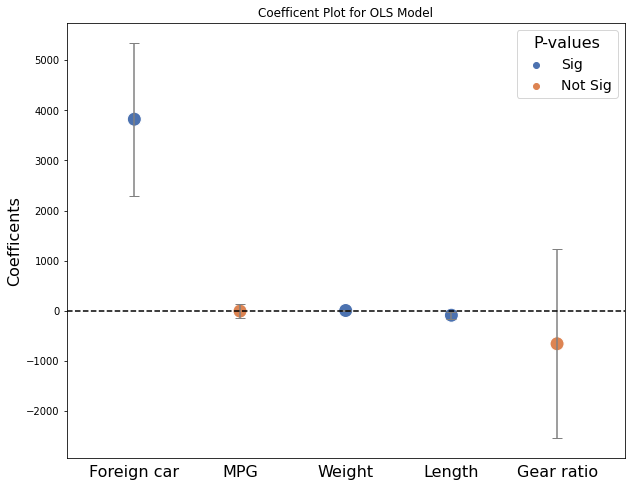

In [13]:
### Coefficent Plot ###
plt.style.use('seaborn-colorblind')

fig, ax = plt.subplots(figsize=(10, 8))

# bar plot
# for more parameters: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html

ax.bar(coef_df['varname'], coef_df['coef'], color='none',yerr=coef_df['err'], ecolor='gray', capsize=5)
ax.set_ylabel('') 
ax.set_xlabel('')

#We want very little to be visible from bar plot.

#------------------------------------

# Scatter Plot
sns.scatterplot(x= np.arange(coef_df.shape[0]), y=coef_df['coef'], data=coef_df,
                hue=coef_df['P-values'], ax=ax, marker='o', s=200, palette='deep')

plt.legend(title='P-values', fontsize=14, title_fontsize=16)
# ------------------------------------
#yline=0 
ax.axhline(y=0, linestyle='--', color='black', linewidth=1.5)

ax.xaxis.set_ticks_position('none')
ax.set_xticklabels(['Foreign car', 'MPG', 'Weight', 'Length', 'Gear ratio'], 
                       rotation=0, fontsize=16)
ax.set_ylabel('Coefficents', fontsize=16)
ax.set_title('Coefficent Plot for OLS Model')
#plt.grid(False) 
plt.show()


# Annotating Plot

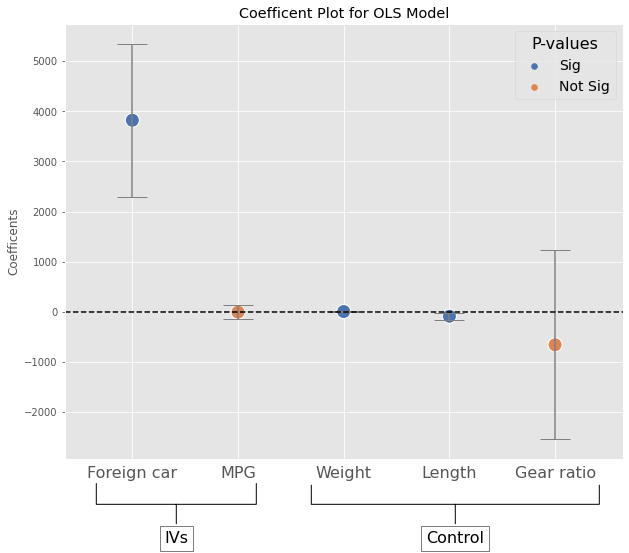

In [14]:
### Coefficent Plot ###
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(10, 8))

# bar plot
# for more parameters: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html

ax.bar(coef_df['varname'], coef_df['coef'], color='none',yerr=coef_df['err'], ecolor='gray', capsize=15)
ax.set_ylabel('') 
ax.set_xlabel('')

#We want very little to be visible from bar plot.

#------------------------------------

# Scatter Plot
sns.scatterplot(x= np.arange(coef_df.shape[0]), y=coef_df['coef'], data=coef_df,
                hue=coef_df['P-values'],ax=ax, marker='o', s=200, palette='deep')

plt.legend(title='P-values', fontsize=14, title_fontsize=16)
# ------------------------------------
#yline=0 
ax.axhline(y=0, linestyle='--', color='black', linewidth=1.5)

ax.xaxis.set_ticks_position('none')
ax.set_xticklabels(['Foreign car', 'MPG', 'Weight', 'Length', 'Gear ratio'], 
                       rotation=0, fontsize=16)
ax.set_ylabel('Coefficents')
ax.set_title('Coefficent Plot for OLS Model')


ax.annotate('IVs', xy=(0.2, -0.1), xytext=(0.2, -0.2), 
            xycoords='axes fraction', 
            textcoords='axes fraction', 
            fontsize=16, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white', ec='black'),
            arrowprops=dict(arrowstyle='-[, widthB=5, lengthB=1.3', lw=1, color='black'))

_ = ax.annotate('Control', xy=(0.7, -0.1), xytext=(0.7, -0.2), 
                 xycoords='axes fraction', 
                 textcoords='axes fraction', 
                 fontsize=16, ha='center', va='bottom',
                 bbox=dict(boxstyle='square', fc='white', ec='black'),
                 arrowprops=dict(arrowstyle='-[, widthB=9, lengthB=1.2', lw=1, color='black'))


#plt.grid(False) 
plt.show()

# Multiple Models

In [15]:
df

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic
...,...,...,...,...,...,...,...,...,...,...,...,...
69,VW Dasher,7140,23,4.0,2.5,12,2160,172,36,97,3.74,Foreign
70,VW Diesel,5397,41,5.0,3.0,15,2040,155,35,90,3.78,Foreign
71,VW Rabbit,4697,25,4.0,3.0,15,1930,155,35,89,3.78,Foreign
72,VW Scirocco,6850,25,4.0,2.0,16,1990,156,36,97,3.78,Foreign


In [16]:
model2 = smf.ols(formula= 'price ~ mpg + weight + length + gear_ratio + C(foreign) + turn + displacement', data=df).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     12.70
Date:                Mon, 24 Jan 2022   Prob (F-statistic):           3.33e-10
Time:                        06:04:14   Log-Likelihood:                -664.14
No. Observations:                  74   AIC:                             1344.
Df Residuals:                      66   BIC:                             1363.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              8683.24

In [17]:
model2.params

Intercept                8683.247229
C(foreign)[T.Foreign]    3473.019669
mpg                       -24.468512
weight                      4.946534
length                    -74.758685
gear_ratio                 82.379449
turn                     -150.291393
displacement                9.097002
dtype: float64

In [18]:
model2.conf_int()

,0,1
Intercept,-3897.328029,21263.822486
C(foreign)[T.Foreign],1885.901392,5060.137946
mpg,-170.370405,121.433382
weight,2.513832,7.379236
length,-145.418116,-4.099253
gear_ratio,-2036.581509,2201.340407
turn,-383.115497,82.532710
displacement,-4.427831,22.621835


In [19]:
err_series2= model2.params- model2.conf_int()[0]

err_series2

Intercept                12580.575257
C(foreign)[T.Foreign]     1587.118277
mpg                        145.901893
weight                       2.432702
length                      70.659432
gear_ratio                2118.960958
turn                       232.824103
displacement                13.524833
dtype: float64

In [20]:
coef_df['model']=1

coef_df

,coef,err,varname,P-values,model
0,3822.785079,1526.901093,C(foreign)[T.Foreign],Sig,1
1,-6.236780,145.875573,mpg,Not Sig,1
2,5.456584,2.166387,weight,Sig,1
3,-88.599664,68.190255,length,Sig,1
4,-657.745668,1881.304144,gear_ratio,Not Sig,1


In [21]:
# We now have all three things. 

#Let's combine all together without intercept.

coef_df2 = pd.DataFrame({'coef': model2.params.values[1:],
                        'err': err_series2.values[1:],
                        'varname': err_series2.index.values[1:],
                         'P-values':['Sig','Not Sig', 'Sig', 'Sig', 'Not Sig', 'Not Sig', 'Not Sig'],
                         'model':2
                       })
coef_df2

,coef,err,varname,P-values,model
0,3473.019669,1587.118277,C(foreign)[T.Foreign],Sig,2
1,-24.468512,145.901893,mpg,Not Sig,2
2,4.946534,2.432702,weight,Sig,2
3,-74.758685,70.659432,length,Sig,2
4,82.379449,2118.960958,gear_ratio,Not Sig,2
5,-150.291393,232.824103,turn,Not Sig,2
6,9.097002,13.524833,displacement,Not Sig,2


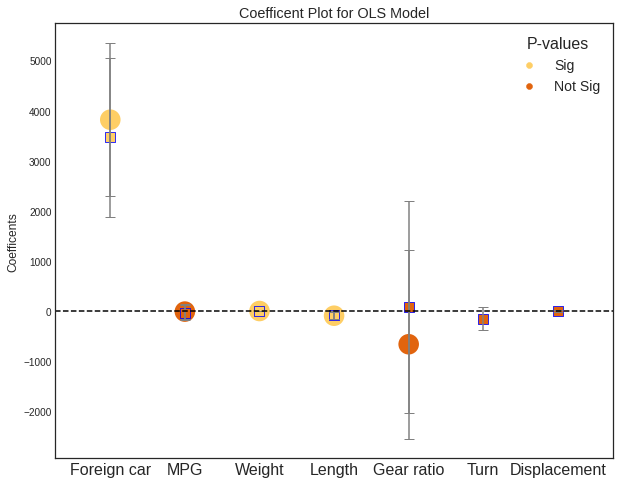

In [22]:
### Coefficent Plot ###
plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize=(10, 8))

# bar plot
# for more parameters: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html

ax.bar(coef_df['varname'], coef_df['coef'], color='none',yerr=coef_df['err'], ecolor='gray', capsize=5)


ax.bar(coef_df2['varname'], coef_df2['coef'], color='none',yerr=coef_df2['err'], ecolor='gray', capsize=5)

ax.set_ylabel('') 
ax.set_xlabel('')

# Scatter Plot
sns.scatterplot(x= np.arange(coef_df.shape[0]), y=coef_df['coef'], data=coef_df,
                hue=coef_df['P-values'], ax=ax, marker='o', s=500, color='b',palette="YlOrBr", legend=False)

sns.scatterplot(x= np.arange(coef_df2.shape[0]), y=coef_df2['coef'], data=coef_df2,
                hue=coef_df2['P-values'], ax=ax, marker='s', s=100, palette="YlOrBr", edgecolor='b')
plt.legend(title='P-values', fontsize=14, title_fontsize=16)

# ------------------------------------
#yline=0 
ax.axhline(y=0, linestyle='--', color='black', linewidth=1.5)

ax.xaxis.set_ticks_position('none')
ax.set_xticklabels(['Foreign car', 'MPG', 'Weight', 'Length', 'Gear ratio', 'Turn', 'Displacement'], 
                       rotation=0, fontsize=16)
ax.set_ylabel('Coefficents')
ax.set_title('Coefficent Plot for OLS Model')


plt.show()